# Visualize urban air temperature
- This script is used to visualize urban air temperature in HadUK-Grid, UKCP18-Local and simulations by grids and landunits.
- Simulations: CNTL_GM, LCZ_GM.

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [3]:
crs = "EPSG:4326"
shapefile_path = home_path + 'dataset/Office_for_National_Statistics/county_boundary/Counties_and_Unitary_Authorities_December_2023_Boundaries_UK_BSC_4915494739307740134/CTYUA_DEC_2023_UK_BSC.shp'
gdf = gpd.read_file(shapefile_path)
gdf_platecarree = gdf.to_crs(crs)
gdf_platecarree

,CTYUA23CD,CTYUA23NM,CTYUA23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,None,447160,531474,-1.27018,54.6761,cac38353-d18e-41b0-8952-f7f074e02c99,"MULTIPOLYGON (((-1.24194 54.72272, -1.24252 54..."
1,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,32fd4486-f372-4653-8ec0-dd0c2a5efb99,"MULTIPOLYGON (((-1.23126 54.58607, -1.22901 54..."
2,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,346eb7dc-818b-4e30-b1b4-c4fdb0d90818,"POLYGON ((-1.11881 54.62886, -1.08462 54.6204,..."
3,E06000004,Stockton-on-Tees,None,444940,518179,-1.30664,54.5569,b73461f7-e9ce-44c6-b171-6bcc24a77ec2,"MULTIPOLYGON (((-1.20074 54.62303, -1.20524 54..."
4,E06000005,Darlington,None,428029,515648,-1.56835,54.5353,f5516d6b-2416-45a1-9818-f8ae39d02798,"POLYGON ((-1.64163 54.61937, -1.63324 54.61613..."
...,...,...,...,...,...,...,...,...,...
213,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.6984,19993d3f-0812-420e-bd8c-004ce9615e40,"POLYGON ((-3.03389 51.72551, -3.02542 51.71813..."
214,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.7783,c915c467-0c13-48f6-9a79-ac3634c059fa,"POLYGON ((-3.05206 51.97287, -3.0519 51.97259,..."
215,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.5823,85cbf27a-c2b9-469e-a83e-41e6128a5d82,"POLYGON ((-2.8285 51.64282, -2.80568 51.62372,..."
216,W06000023,Powys,Powys,302329,273254,-3.43531,52.3486,68948aa5-52ea-476f-a431-6887efe52e5f,"POLYGON ((-3.15484 52.89809, -3.1475 52.89017,..."


In [11]:
greater_manchester_counties = ['Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale','Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan']
gdf_greater_manchester = gdf_platecarree[gdf_platecarree['CTYUA23NM'].isin(greater_manchester_counties)]
linewidth = 0.5
proj = ccrs.PlateCarree()
labelcolor = '#6b6b6b'
#cmap = 'viridis'
cmap = 'coolwarm'
extent = [gdf_greater_manchester.total_bounds[0], gdf_greater_manchester.total_bounds[2], gdf_greater_manchester.total_bounds[1], gdf_greater_manchester.total_bounds[3]]
#ytick_list = [2, 0.25]
#xtick_list = [2, 0.25]
xticks = [-2.74, -2.50, -2.25, -2.00, -1.9]
yticks = [53.32, 53.50, 53.69]
labelsize = 6
fontsize = 6
boundarywidth = 0.5
alpha = 0.5
padding = 5
title_list = ['(a) 12:00, 19 July 2022 HadUK-Grid', '(b) 12:00, 19 July 2022 UKCP18-Local', 
              '(c) 15:00, 19 July 2022 CNTL_GM', '(d) 15:00, 19 July 2022 LCZ_GM', 
              '(e) JJA mean CNTL_GM', '(f) JJA mean LCZ_GM']
extent = [-2.74, -1.9, 53.32, 53.69]  # Define extent based on your lon and lat range
output_dir = home_path + '0_lcz_mcr/output_analysis/regional/urban_air_temperature/'
sim_list = ['def', 'lcz']
var = 'TSA'
#var_grid = 'TREFMXAV_U'
var_grid = 'TSA'
vmin = 35
vmax = 39
urban_lnd_list = [[8,9], [7,8,9,10,11,12,14,15,16]]
urban_lable = [['HD', 'MD'], ['LCZ1', 'LCZ2', 'LCZ3', 'LCZ4', 'LCZ5', 'LCZ6', 'LCZ8', 'LCZ9', 'LCZ10']]
output_dir = home_path + '0_lcz_mcr/output_analysis/regional/urban_air_temperature/'
pad = 2
handletextpad = 0.5
lc0 = '#a6cee3'
lc1 = '#1f78b4'
lc2 = '#b2df8a'
lc3 = '#33a02c'
lc4 = '#fb9a99'
lc5 = '#e31a1c'
lc6 = '#fdbf6f'
lc7 = '#ff7f00'
lc8 = '#cab2d6'
lc_list = [[lc0, lc6, labelcolor, labelcolor],
           [lc0, lc1, lc2, lc3, lc4, lc5, lc6, lc7, lc8, labelcolor, labelcolor]]
marker = 'o'
markersize = 1
yloc_legend = [0.8, 0.35]
xloc_legend = [0.11, 0.123]
y_offset = [0, yloc_legend[0] - yloc_legend[1]]
x_offset = 0.2
hadgrid = xr.open_dataset(home_path + '/0_lcz_mcr/output_analysis/regional/urban_air_temperature/grid/haduk_19_07_tmax_mcr.nc')
ukcp = xr.open_dataset(home_path + '/0_lcz_mcr/output_analysis/regional/urban_air_temperature/grid/ukcp_19_07_tmax_mcr.nc')
rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

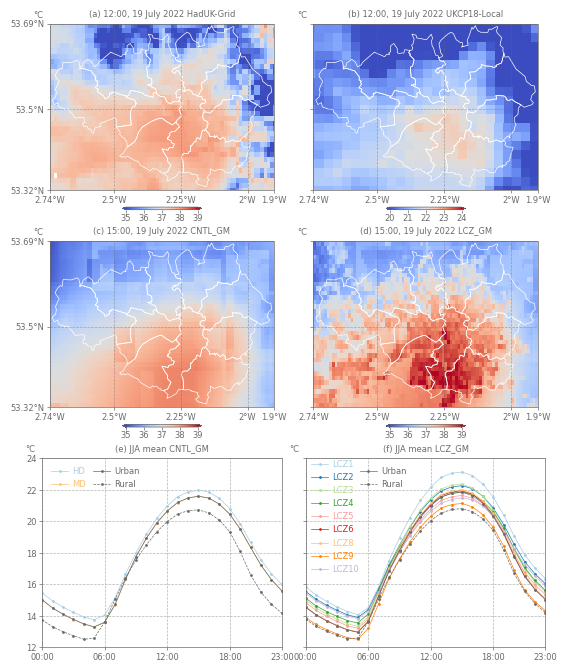

In [12]:
fig = plt.figure(figsize=(5.5, 6.6))
# Initialize an empty list for axes
ax = []
# Add subplots one by one
row_num = 3
col_num = 2
proj = ccrs.PlateCarree()  # Example projection
ax.append(fig.add_subplot(row_num, col_num, 1, projection=proj))  # First plot with projection
ax.append(fig.add_subplot(row_num, col_num, 2, projection=proj))  # Second plot without projection
ax.append(fig.add_subplot(row_num, col_num, 3, projection=proj))  # Third plot with projection
ax.append(fig.add_subplot(row_num, col_num, 4, projection=proj))  # Fourth plot without projection
ax.append(fig.add_subplot(row_num, col_num, 5))  # First plot with projection
ax.append(fig.add_subplot(row_num, col_num, 6))  


ax[0].pcolormesh(hadgrid.lon.values, hadgrid.lat.values, hadgrid.tasmax, cmap=cmap, vmin = vmin, vmax = vmax)
colormesh_ukcp = ax[1].pcolormesh(ukcp.grid_longitude.values, ukcp.grid_latitude.values, ukcp.tasmax,  transform = rotated_pole, cmap=cmap, vmin = 20, vmax = 24)
#ukcp['tasmax'].plot(ax=ax[1], transform = rotated_pole, cmap=cmap, vmin = vmin, vmax = vmax)
for i in range(2,6):
    index = (i-2)%2
    tag = sim_list[index]
    ds = xr.open_dataset(home_path + '/0_lcz_mcr/archive/regional_analysis_' + tag + '/lnd/hist/regional_analysis_' + tag + '.clm2.h0.2022-06-01-03600.nc')
    if (i-2)//2 == 0:
        max_time_index = ds[var].mean(axis = (1,2)).idxmax(dim='time')
        colormesh = ax[i].pcolormesh(ds.lon.values, ds.lat.values, ds[var_grid].sel(time=max_time_index)-273.15, cmap=cmap, vmin = vmin, vmax = vmax)
        #print(max_time_index)
    else:   
        df_sim = pd.read_csv(output_dir + 'landunit/' + tag + '.csv')
        df_sim_urban = pd.read_csv(output_dir + 'landunit/' + tag + '_urban.csv')
        df_sim_rural = pd.read_csv(output_dir + 'landunit/' + tag + '_rural.csv')
        df_lnd = df_sim[df_sim['time'] <= '2022-09-01'].copy()
        df_lnd['time'] = pd.to_datetime(df_lnd['time'])
        df_lnd_urban = df_sim_urban[df_sim_urban['time'] <= '2022-09-01'].copy()
        df_lnd_urban['time'] = pd.to_datetime(df_lnd_urban['time'])
        df_lnd_urban['hour'] = df_lnd_urban['time'].dt.hour
        df_hourly_urban = df_lnd_urban.groupby('hour').mean().drop(columns = ['time']).reset_index()
        df_lnd_rural = df_sim_rural[df_sim_rural['time'] <= '2022-09-01'].copy()
        df_lnd_rural['time'] = pd.to_datetime(df_lnd_rural['time'])
        df_lnd_rural['hour'] = df_lnd_rural['time'].dt.hour
        df_hourly_rural = df_lnd_rural.groupby('hour').mean().drop(columns = ['time']).reset_index()
        for j, numurbl in enumerate(urban_lnd_list[index]):
            df = df_lnd[df_lnd['numurbl'] == numurbl].copy()
            df['hour'] = df['time'].dt.hour
            df_hourly = df.groupby('hour').mean().drop(columns = ['numurbl', 'time']).reset_index()
            ax[i].plot(df_hourly['hour'], df_hourly[var], label = urban_lable[index][j], linewidth =linewidth, color = lc_list[index][j], marker = marker, markersize = markersize, markerfacecolor = 'none')
        ax[i].plot(df_hourly_urban['hour'], df_hourly_urban[var], label = 'Urban', linewidth =linewidth, color = labelcolor, marker = marker, markersize = markersize, markerfacecolor = 'none')
        ax[i].plot(df_hourly_rural['hour'], df_hourly_rural[var], label = 'Rural', linestyle = '--', linewidth =linewidth, color = labelcolor, marker = marker, markersize = markersize, markerfacecolor = 'none')
        ax[i].set_xlim([0, 23])
        ax[i].set_ylim([12, 24])
        ax[i].set_xticks([0, 6, 12, 18, 23])
        ax[i].set_xticklabels(['00:00', '06:00', '12:00', '18:00', '23:00'])
        line, label = ax[i].get_legend_handles_labels()  
        legend1 = ax[i].legend(line[:-2], label[:-2], bbox_to_anchor=(xloc_legend[index] , yloc_legend[index]), loc='lower center', frameon=False, handletextpad=handletextpad, fontsize=fontsize, ncol=1)
        ax[i].add_artist(legend1)
        legend2 = ax[i].legend(line[-2:], label[-2:], bbox_to_anchor=(xloc_legend[index] + x_offset, yloc_legend[index] + y_offset[index]), loc='lower center', frameon=False, handletextpad=handletextpad, fontsize=fontsize, ncol=1)
        for j, text in enumerate(legend1.get_texts()):
            text.set_color(lc_list[index][:-2][j])   
        for j, text in enumerate(legend2.get_texts()):
            text.set_color(lc_list[index][-2:][j])

for i in range(6):  
    if i//4 == 0:
        ax[i].set_extent(extent)
        ax[i].set_xticks(xticks, crs = proj)
        ax[i].set_yticks(yticks, crs = proj)
        gdf_greater_manchester.plot(ax=ax[i], edgecolor='white', linewidth = linewidth, facecolor='none')
        ax[i].xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
        ax[i].yaxis.set_major_formatter(LatitudeFormatter()) 
    if i in [1, 3, 5]:
        ax[i].tick_params(axis='y', labelleft=False, labelsize=labelsize, length=2, pad =pad, width = boundarywidth,colors=labelcolor) 
    #if i in [4, 5]:
        #ax[i].tick_params(axis='x', labelbottom=False, labelsize=labelsize, length=2, pad =pad, width = boundarywidth,colors=labelcolor)                    
    ax[i].set_title(title_list[i], fontsize = fontsize, color = labelcolor, pad = padding)    
    ax[i].tick_params(axis='both', labelsize=labelsize, length=2, pad =pad, width = boundarywidth, colors=labelcolor)
    ax[i].grid('both', linewidth=linewidth, color=labelcolor, alpha=alpha, linestyle='--')
    ax[i].set_ylabel('°C', labelpad=5, rotation=0, ha='center', fontsize=labelsize,color=labelcolor)
    ax[i].yaxis.set_label_coords(-0.05, 1.025)
    for spine in ax[i].spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)    
for i in range(4):
    if i ==1:
        cs = colormesh_ukcp
        cbar_ticks = [20, 21, 22, 23, 24]
    else:
        cs = colormesh    
        cbar_ticks = [35, 36, 37, 38, 39]
    cbar = plt.colorbar(cs, ax=ax[i], shrink=0.33, orientation='horizontal', location='bottom', pad=0.09, extend='both', fraction=0.03, aspect=30)
    cbar.ax.tick_params(length=2,labelsize=labelsize, pad = 1, width=boundarywidth, colors=labelcolor)
    cbar.outline.set_linewidth(boundarywidth)
    cbar.outline.set_edgecolor(labelcolor)
    cbar.ax.yaxis.label.set_color(labelcolor)
    cbar.ax.set_xticks(cbar_ticks)
    cbar.ax.set_position([0.1, 0.1, 0.4, 0.5]) #[left, top, width, height]
#cbar.set_label('°C', fontsize=labelsize, color=labelcolor)
#cbar.ax.xaxis.set_label_coords(1.1, -1)        
       
plt.subplots_adjust(left=0.06, right=0.975, bottom=0.025, top=0.97, wspace=0.1, hspace=0.15)        
# Show the figure
fig.savefig(output_dir + 'heat_map.png', dpi=300)  
fig.savefig(output_dir + 'heat_map.pdf', dpi=600)

# Result description

In [52]:
df_def_sim = pd.read_csv(output_dir + 'landunit/def.csv')
df_def = df_def_sim[df_def_sim['time'] <= '2022-09-01'].copy()
df_def['time'] = pd.to_datetime(df_def['time'])
df_def['hour'] = df_def['time'].dt.hour
df_hourly = df_def.groupby(['hour', 'numurbl']).mean().reset_index()
print(round(df_hourly[df_hourly['numurbl'] ==8][var].max(), 1), round(df_hourly[df_hourly['numurbl'] ==9][var].max(),1))

22.0 21.6


In [53]:
df_def_rural_sim = pd.read_csv(output_dir + 'landunit/def_rural.csv')
df_def_rural = df_def_rural_sim[df_def_rural_sim['time'] <= '2022-09-01'].copy()
df_def_rural['time'] = pd.to_datetime(df_def_rural['time'])
df_def_rural['hour'] = df_def_rural['time'].dt.hour
df_hourl_rural = df_def_rural.groupby(['hour']).mean().reset_index()
print(round(df_hourly_rural[var].min(), 1), round(df_hourly_rural[var].max(),1))

12.5 20.8


In [54]:
(df_hourly[df_hourly['numurbl'] ==8][var]).reset_index().drop(columns = ['index']) - df_hourly_rural[var].reset_index().drop(columns = ['index'])

,TSA
0,1.679354
1,1.609387
2,1.536789
3,1.467573
4,1.398942
5,1.156214
6,0.428603
7,0.090373
8,0.216811
9,0.430926


In [47]:
(df_hourly[df_hourly['numurbl'] ==8][var]).reset_index().drop(columns = ['index'])

,TSA
0,14.846040
1,14.393261
2,14.034733
3,13.729926
4,13.462151
5,13.285671
6,13.477406
7,14.323633
8,15.703111
9,17.090918


In [12]:
df_lcz_sim = pd.read_csv(output_dir + 'landunit/lcz.csv')
df_lcz = df_lcz_sim[df_lcz_sim['time'] <= '2022-09-01'].copy()
df_lcz['time'] = pd.to_datetime(df_lcz['time'])
df_lcz['hour'] = df_lcz['time'].dt.hour
df_lcz_hourly = df_lcz.groupby(['hour', 'numurbl']).mean().reset_index()
print(round(df_lcz_hourly[df_lcz_hourly['numurbl'] ==7][var].max(), 1), round(df_lcz_hourly[df_lcz_hourly['numurbl'] ==15][var].max(), 1))

23.1 21.1


In [13]:
df_lcz_rural_sim = pd.read_csv(output_dir + 'landunit/lcz_rural.csv')
df_lcz_rural = df_lcz_rural_sim[df_lcz_rural_sim['time'] <= '2022-09-01'].copy()
df_lcz_rural['time'] = pd.to_datetime(df_lcz_rural['time'])
df_lcz_rural['hour'] = df_lcz_rural['time'].dt.hour
df_lcz_hourly_ruraly = df_lcz_rural.groupby(['hour']).mean().reset_index()

In [14]:
(df_lcz_hourly[df_lcz_hourly['numurbl'] ==15][var]).reset_index().drop(columns = ['index']) - df_lcz_hourly_rural[var].reset_index().drop(columns = ['index'])

,TSA
0,0.113585
1,0.117258
2,0.100609
3,0.092990
4,0.086660
5,-0.087584
6,-0.420909
7,-0.280602
8,-0.066000
9,0.038827
